In [28]:
from bluesky.callbacks import CallbackBase
import matplotlib.pyplot as plt

class MyICATCallback(CallbackBase):
    
    def __init__(self,db):
        self.db = db

        
    def stop(self, doc):
        run = db[-1]
        
        # As an example we can plot the data, we could also export it to ICAT here.
        
        fig, ax = plt.subplots()
        data = run.primary.read()
        ax.plot(data.motor, data.det) #Note that we are making assumptions about what the data contains. Need to look things like file export for example to generalise. 
        plt.ylabel(run.primary.metadata['start']['detectors'][0])
        plt.xlabel(run.primary.metadata['start']['motors'][0])
        
      
        

In [29]:
# Create a test run engine and attach our callback

from bluesky import RunEngine

RE = RunEngine({})

#Get the databroker https://gist.github.com/untzag/53281819709b1058c7708a250cbd3676
from databroker.v2 import temp
db = temp()

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)

0

In [30]:

RE.subscribe(MyICATCallback(db))

1

('dae9eec5-2a22-42f7-92bd-e057346798eb',)

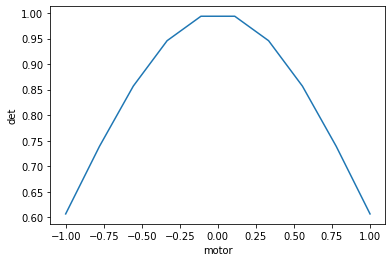

In [31]:
from bluesky.plans import scan
from ophyd.sim import det, motor

RE(scan([det],motor, -1,1,10))